In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Let's read our dataset from the csv
df = pd.read_csv
df = pd.read_csv('/content/covid_dataset.csv')

In [ ]:
df.head(10) #checking our table

,Temperature,Cough,Lost Taste,Lost Smell,Covid
0,High,Yes,Can’t Say,No,No
1,High,Yes,Yes,Yes,Yes
2,Average,Yes,No,No,No
3,Low,No,No,No,No
4,High,No,Yes,Yes,Yes
5,Average,Yes,Yes,Yes,Yes
6,Low,Yes,No,No,No
7,High,Yes,Yes,No,Yes
8,Average,No,Can’t Say,Yes,Yes
9,Low,No,Can’t Say,No,No


In [ ]:
df.describe() #viewing some statistics on our datset

,Temperature,Cough,Lost Taste,Lost Smell,Covid
count,10,10,10,10,10
unique,3,2,3,2,2
top,High,Yes,Yes,No,No
freq,4,6,4,6,5


In [ ]:
#importing libraries to visualize our data
import matplotlib.pyplot as plt
import seaborn as sns

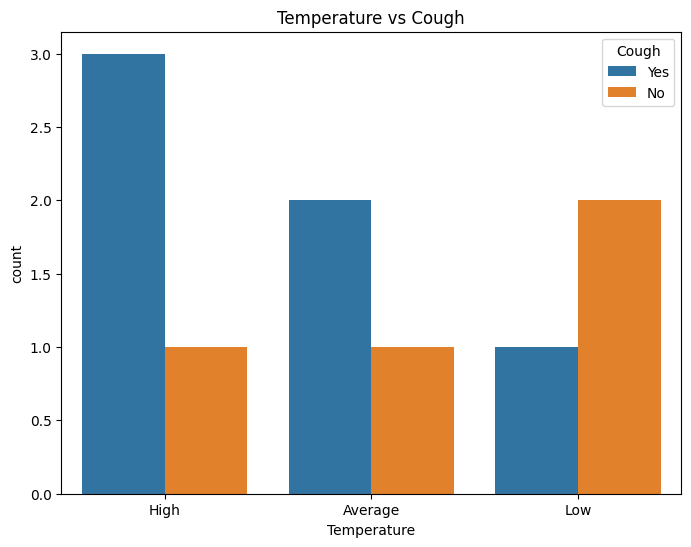

In [ ]:
#visualizing data
# Plotting 'Temperature' against 'Cough' using seaborn
plt.figure(figsize=(8,6))
sns.countplot(x='Temperature', hue='Cough', data=df)
plt.title('Temperature vs Cough')
plt.show()


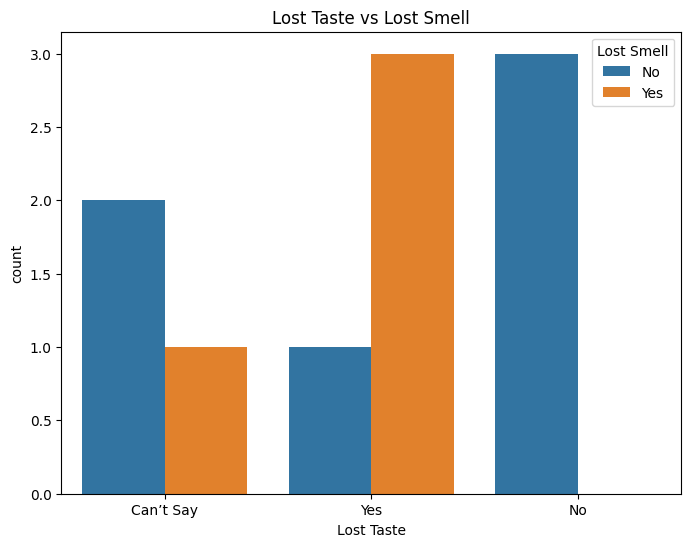

In [ ]:
# Plotting 'Lost Taste' against 'Lost Smell' using seaborn
plt.figure(figsize=(8,6))
sns.countplot(x='Lost Taste', hue='Lost Smell', data=df)
plt.title('Lost Taste vs Lost Smell')
plt.show()

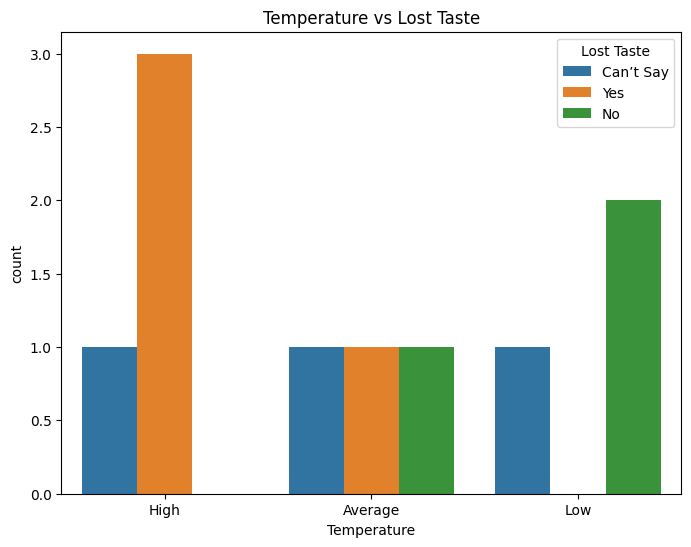

In [ ]:
# Plotting 'Lost Taste' against 'Lost Smell' using seaborn
plt.figure(figsize=(8,6))
sns.countplot(x='Temperature', hue='Lost Taste', data=df)
plt.title('Temperature vs Lost Taste')
plt.show()

In [ ]:
df.dtypes #check for the data type of the dataset

Temperature    object
Cough          object
Lost Taste     object
Lost Smell     object
Covid          object
dtype: object

In [ ]:
df['Lost Taste'].value_counts()

Yes          4
Can’t Say    3
No           3
Name: Lost Taste, dtype: int64

In [ ]:
#convert categorical features to numerical using label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Temperature'] = le.fit_transform(df['Temperature'])

In [ ]:
list = ['Cough', 'Lost Taste', 'Lost Smell', 'Covid'] #convert other object types
for col in list:
  df[col] = le.fit_transform(df[col])

In [ ]:
df.dtypes  #check if they are converted

Temperature    int64
Cough          int64
Lost Taste     int64
Lost Smell     int64
Covid          int64
dtype: object

In [ ]:
df['Lost Taste'].value_counts()

2    4
0    3
1    3
Name: Lost Taste, dtype: int64

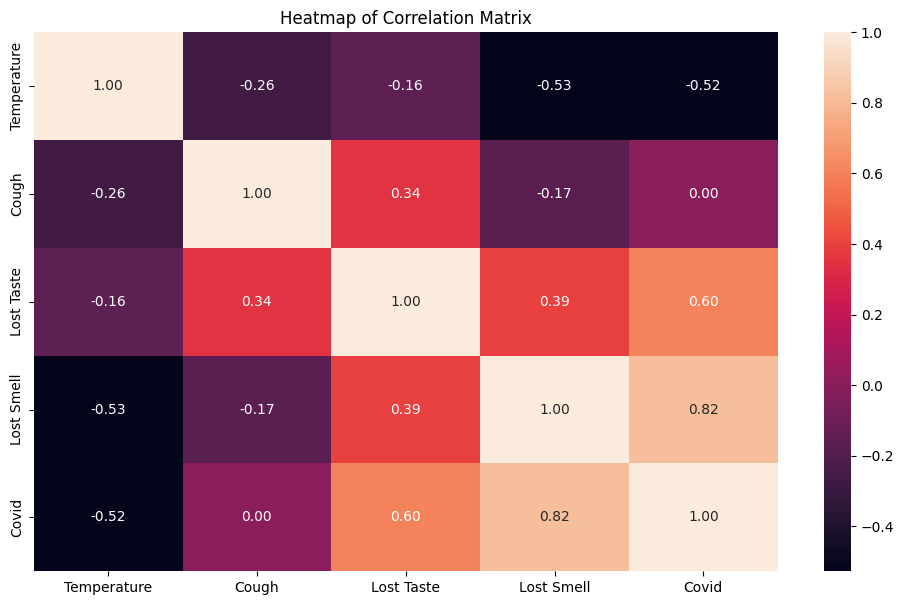

In [ ]:
#Let's now check the correlation between features using heatmaps

plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [ ]:
df.corr() #numerical correlation

,Temperature,Cough,Lost Taste,Lost Smell,Covid
Temperature,1.000000,-2.635231e-01,-0.155417,-0.527046,-5.163978e-01
Cough,-0.263523,1.000000e+00,0.344031,-0.166667,2.266233e-17
Lost Taste,-0.155417,3.440312e-01,1.000000,0.393179,6.019293e-01
Lost Smell,-0.527046,-1.666667e-01,0.393179,1.000000,8.164966e-01
Covid,-0.516398,2.266233e-17,0.601929,0.816497,1.000000e+00


In [ ]:
df['Lost Taste'].unique()

array([0, 2, 1])

In [ ]:
df.head(10)

,Temperature,Cough,Lost Taste,Lost Smell,Covid
0,1,1,0,0,0
1,1,1,2,1,1
2,0,1,1,0,0
3,2,0,1,0,0
4,1,0,2,1,1
5,0,1,2,1,1
6,2,1,1,0,0
7,1,1,2,0,1
8,0,0,0,1,1
9,2,0,0,0,0


In [ ]:
#splitting data

X = df.drop('Covid', axis = 1)
y = df['Covid']

In [ ]:
#import libraries for our decison tree
from sklearn.tree import DecisionTreeClassifier

#the model
dtc = DecisionTreeClassifier(criterion='gini', random_state = 42)
dtc.fit(X, y) #fit the model


DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the testing set
y_pred = dtc.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
def gini_index(a, b):
  total = a + b
  prob_a = a/total
  prob_b = b/total
  return 1 - (prob_a**2) - (prob_b**2)

#calculate parent gini
covid = 5 #number of people with covid
no_covid = 5 #number of people without covid
parent_gini = gini_index(covid, no_covid)

#gini for each value of 'Temperature'
gini_high = gini_index(3,1)  # 3 yes, 1 no
gini_average = gini_index(2,1)  #2 yes, 1 no
gini_low = gini_index(0,3)  #0 yes, 3 no

#weighted gini for 'Temperature'
weighted_gini_Temp = ((4/10)*gini_high) + ((3/10)*gini_average) + ((3/10)*gini_low)

#gini gain for 'Temperature'
gini_gain_Temp = parent_gini - weighted_gini_Temp

gini_gain_Temp

0.21666666666666667

In [ ]:
#gini for each value of 'Cough'
gini_yes = gini_index(3,3)  # 3 yes, 3 no
gini_no = gini_index(2,2)  #2 yes, 1 no

gini_index(covid, no_covid)

#weighted gini for 'Cough'
weighted_gini_cough = ((6/10)*gini_yes) + ((4/10)*gini_no)

#gini gain for 'Cough'
gini_gain_cough = parent_gini - weighted_gini_cough

gini_gain_cough

0.0

In [ ]:
#gini for each value of 'Lost Taste'
gini_yes = gini_index(4,0)  # 4 yes, 0 no
gini_no = gini_index(0,3)  #0 yes, 3 no
gini_cant_say = gini_index(1,2)  #1 yes, 2 no

gini_index(covid, no_covid)

#weighted gini for 'Lost Taste'
weighted_gain_taste = ((4/10)*gini_yes) + ((3/10)*gini_no) + ((3/10)*gini_cant_say)

#gini gain for 'Loast taste'
gini_gain_taste = parent_gini - weighted_gain_taste

gini_gain_taste

0.3666666666666667

In [ ]:
#gini for each value of 'Lost smell'
gini_yes = gini_index(4,0)  # 4 yes, 0 no
gini_no = gini_index(1,5)  #1 yes, 5 no

gini_index(covid, no_covid)

#weighted gini for 'Lost smell'
weighted_gini_smell = ((4/10)*gini_yes) + ((6/10)*gini_no)

#gini gain for 'Lost smell'
gini_gain_smell = parent_gini - weighted_gini_smell

gini_gain_smell

0.33333333333333337

In [ ]:
print(f'gini gain for temperature is: {gini_gain_Temp:.2f}')
print(f'gini gain for cough is:  {gini_gain_cough:.2f}')
print(f'gini gain for Lost taste is: {gini_gain_taste:.2f}')
print(f'gini gain for Lost smell is: {gini_gain_smell:.2f}')

gini gain for temperature is: 0.22
gini gain for cough is:  0.00
gini gain for Lost taste is: 0.37
gini gain for Lost smell is: 0.33


In [ ]:
#The input variable with the highest gini gain is Lost taste
#Therefore, Lost taste is the most important feature
#To confirm the result, let's use feature importance

In [ ]:
# Get feature importances
importances = dtc.feature_importances_

# Create a dataframe for visualization
final_df = pd.DataFrame({"Features": X.columns, "Importances":importances})
final_df.set_index('Importances')

,Features
Importances,
0.000000,Temperature
0.000000,Cough
0.666667,Lost Taste
0.333333,Lost Smell


In [ ]:
#Though the values vary due to different methods used, however
#lost taste still has the value with highest gini gain

In [ ]:
# Finding the feature with maximum importance
relevant_feature = final_df.loc[final_df['Importances'].idxmax()]['Features']

print("The most important feature is: ", relevant_feature)

The most important feature is:  Lost Taste


In [ ]:
#ouput the best gini feature
print(f"Best Gini Gain (GG) of the feature: {gini_gain_taste:.2f}")

Best Gini Gain (GG) of the feature: 0.37


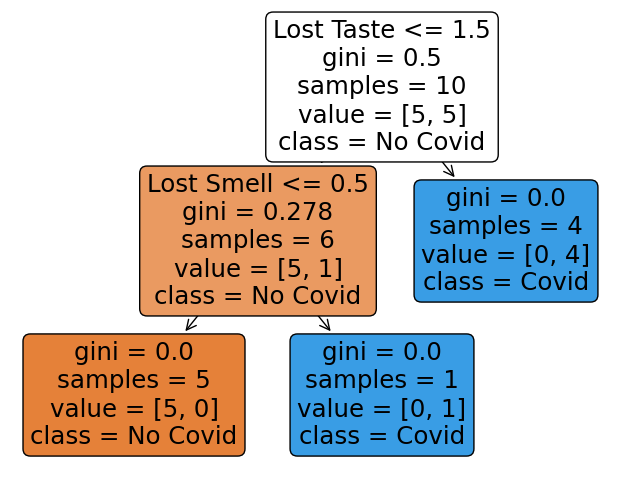

In [ ]:
#using gini to plot tree
from sklearn.tree import plot_tree
# Initialize Decision Tree Classifier
dtc = DecisionTreeClassifier(criterion='gini', random_state=42)
dtc.fit(X, y) # Fit the model

# Plot the decision tree
plt.figure(figsize=(8, 6))
plot_tree(dtc, feature_names=X.columns,
          class_names=['No Covid', 'Covid'], filled=True, rounded=True)
plt.show()


From the data provided, it is noticed that decision tree classifier did not consider 'can't Say' from the "Lost Taste" column as another node but rather factored it as "NO" before considering "Lost Smell" as the second node.


However, after trying to predict the output of covid, it was seen that the model considered "Lost Smell" as the important factor and didn't consider any other variable. This might not be true for the real world data

#REFERENCES

Decision Tree note from the class - Mark Germaine
